In [1]:
%matplotlib inline

import json
import os
import pickle

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torch
import torch.utils.data
import torchvision
from torchvision import transforms
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection.mask_rcnn import MaskRCNNPredictor

In [3]:
model = None
with open("temp.model", "rb") as f:
    model = pickle.load(f)

In [4]:
from Datasets import MoNuSeg

In [5]:
img_name = MoNuSeg.FileReader.files[0]
img = MoNuSeg.FileReader.get_image(img_name)
colormask = MoNuSeg.FileReader.get_colormask(img_name)
polymask = MoNuSeg.FileReader.get_polymask(img_name)

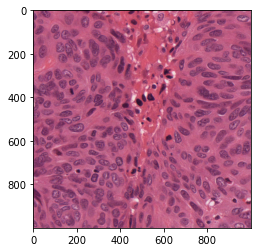

In [6]:
plt.imshow(MoNuSeg.util.correct_axes(img))

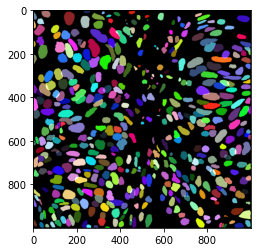

In [7]:
plt.imshow(MoNuSeg.util.correct_axes(colormask))

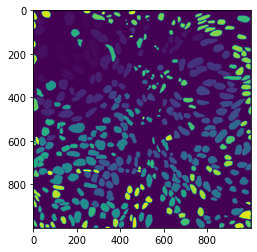

In [8]:
plt.imshow(polymask)

In [ ]:
cell_crop_dir = "/workspaces/dev-container/testing/data/CellCrops/eosinophil/"
def load_cell_crop(filepath):
    if cell_crop_dir not in filepath:
        filepath = os.path.join(cell_crop_dir, filepath)
    img = Image.open(filepath)
    img = transforms.ToTensor()(img)
    return img

In [ ]:
def get_prediction(img):
    prediction = None
    with torch.no_grad():
        prediction = model([img])
    return prediction
def get_prediction_instance(prediction, index):
    return Image.fromarray(prediction[0]['masks'][index, 0].mul(255).byte().numpy())

In [ ]:
cell_crops = os.listdir(cell_crop_dir)
img = load_cell_crop(cell_crops[1])

In [ ]:
prediction = get_prediction(img)

In [ ]:
plt.imshow(MoNuSeg.util.correct_axes(img))

In [ ]:
plt.imshow(get_prediction_instance(prediction, 0))